In [ ]:
!wget https://opendata.arcgis.com/datasets/3aa9f7b1428642998fa399c57dad8045_0.csv

--2020-09-01 17:36:57--  https://opendata.arcgis.com/datasets/3aa9f7b1428642998fa399c57dad8045_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.196.73.37, 54.144.127.131, 34.202.76.40, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.196.73.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘3aa9f7b1428642998fa399c57dad8045_0.csv’

3aa9f7b1428642998fa     [ <=>                ]  36.09K  --.-KB/s    in 0s      

2020-09-01 17:36:57 (312 MB/s) - ‘3aa9f7b1428642998fa399c57dad8045_0.csv’ saved [36955]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

OBJECTID  HR_UID Province  ... NewCaseRate100K7Day SHAPE_Length  SHAPE_Area
0         1    3537       ON  ...            0.347058     1.830824    0.127329
1         2    3538       ON  ...            0.098673     7.844390    0.842562
2         3    3539       ON  ...            0.522628     3.932228    0.625515
3         4    3540       ON  ...            0.406989     3.018443    0.278637
4         5    3541       ON  ...            0.000000     7.504309    0.816650

[5 rows x 37 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             92 non-null     int64  
 1   HR_UID               92 non-null     int64  
 2   Province             92 non-null     object 
 3   ENGNAME              92 non-null     object 
 4   FRENAME              92 non-null     object 
 5   CurrentCaseCount     92 non-null     int64  
 6   CurrentDeaths        83 non-null     float64
 7   CurrentRecovered     69 non-null     float64
 8   CurrentTests         57 non-null     float64
 9   TotalPop2019         92 non-null     int64  
 10  Pop0to4_2019         92 non-null     int64  
 11  Pop5to9_2019         92 non-null     int64  
 12  Pop10to14_2019       92 non-null     int64  
 13  Pop15to19_2019       92 non-null     int64  
 14  Pop20to24_2019       92 non-null     int64  
 15  Pop25to29_2019       92 non-null     int64

In [ ]:
df.isna().mean() * 100

OBJECTID                0.000000
HR_UID                  0.000000
Province                0.000000
ENGNAME                 0.000000
FRENAME                 0.000000
CurrentCaseCount        0.000000
CurrentDeaths           9.782609
CurrentRecovered       25.000000
CurrentTests           38.043478
TotalPop2019            0.000000
Pop0to4_2019            0.000000
Pop5to9_2019            0.000000
Pop10to14_2019          0.000000
Pop15to19_2019          0.000000
Pop20to24_2019          0.000000
Pop25to29_2019          0.000000
Pop30to34_2019          0.000000
Pop35to39_2019          0.000000
Pop40to44_2019          0.000000
Pop45to49_2019          0.000000
Pop50to54_2019          0.000000
Pop55to59_2019          0.000000
Pop60to64_2019          0.000000
Pop65to69_2019          0.000000
Pop70to74_2019          0.000000
Pop75to79_2019          0.000000
Pop80to84_2019          0.000000
Pop85Older              0.000000
AverageAge_2019         0.000000
MedianAge_2019          0.000000
Last_Updat

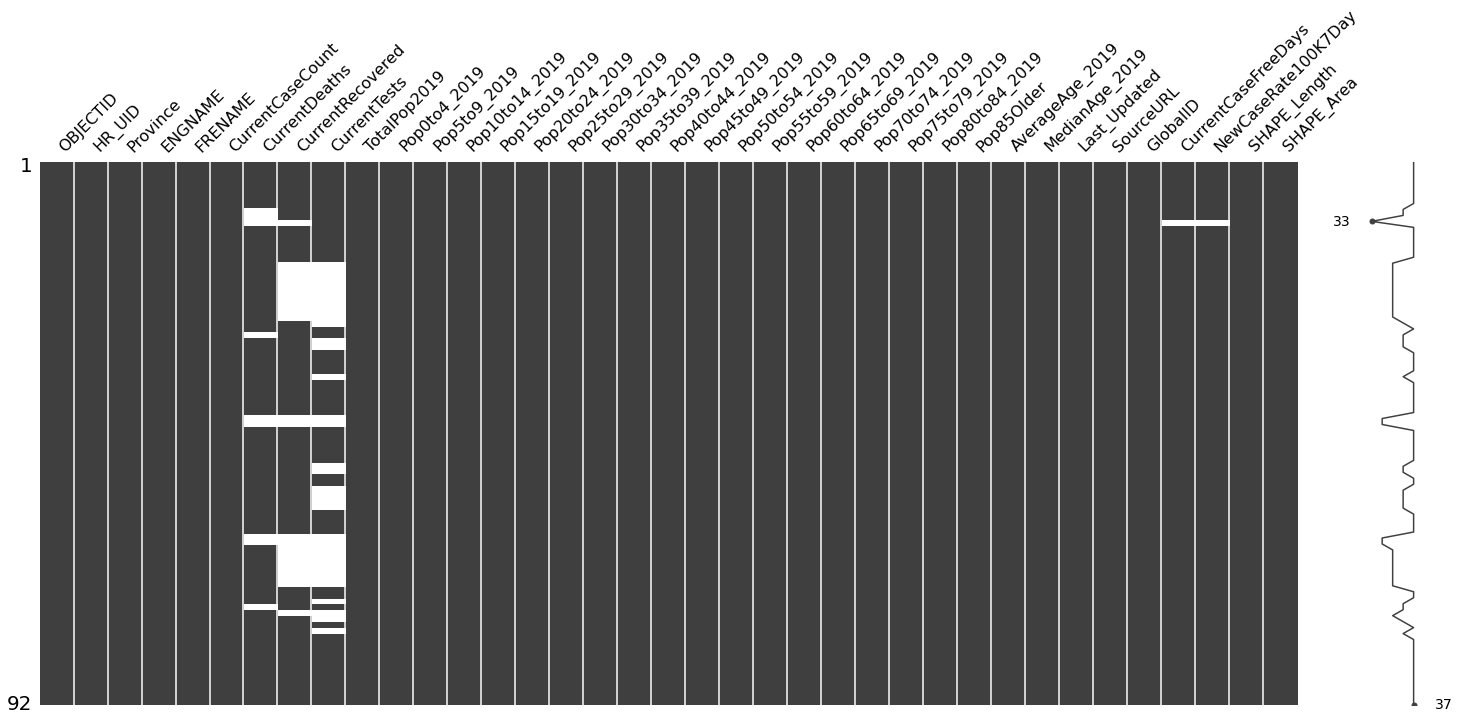

In [ ]:
mn.matrix(df)

In [ ]:
df.Province.value_counts()

ON    34
QC    18
NB     7
SK     6
BC     5
MB     5
AB     5
NS     4
NL     4
NU     1
NT     1
YT     1
PE     1
Name: Province, dtype: int64

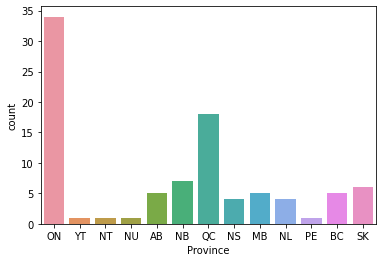

In [ ]:
sns.countplot(df.Province)

In [58]:
#Hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import altair as alt
alt.data_transformers.disable_max_rows()
import math
from IPython.display import HTML
from datetime import datetime

In [2]:
#Hide
#Open Table dataset
df = pd.read_csv('YoY_Seated_Diner_Data_Country.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 198 entries, Type to 8/31
dtypes: float64(165), int64(31), object(2)
memory usage: 162.5+ KB


In [3]:
#Hide
#Data Wrangling 

# Transpose
df1 = df.T

#Update header - use 'Name' values
new_header = df1.iloc[1]
df1 = df1.iloc[2:,:]
df1.columns = new_header

#Adding dates as a column
df1['Date'] = list(df1.index.values)

#Making Date first column
first_col = df1.pop('Date')
df1.insert(0, 'Date', first_col)

#Replacing index names
df1.index = [i for i in range(len(df1))]

#Converting dtypes into numeric
mask = df1.columns[1:].to_list()
for i in mask:
  df1[i] = df1[i].astype('float64')



In [4]:
# Countries - United States, Canada, Mexico
# Cities- US(Wisconsin, Atlanta, Austin, Baltimore, Denver, Honolulu, Houston, Indianapolis, Las Vegas, Los Angeles, Miami, San Diego, New York, Seattle)
#CA(Calgary, Montréal, Toronto, Vancouver ), MEX(Ciudad de México, Mexico City, San Pedro Garza García)

Text(0.5, 0.98, 'Restaurant Reopenings, a Comparison to Last Year')

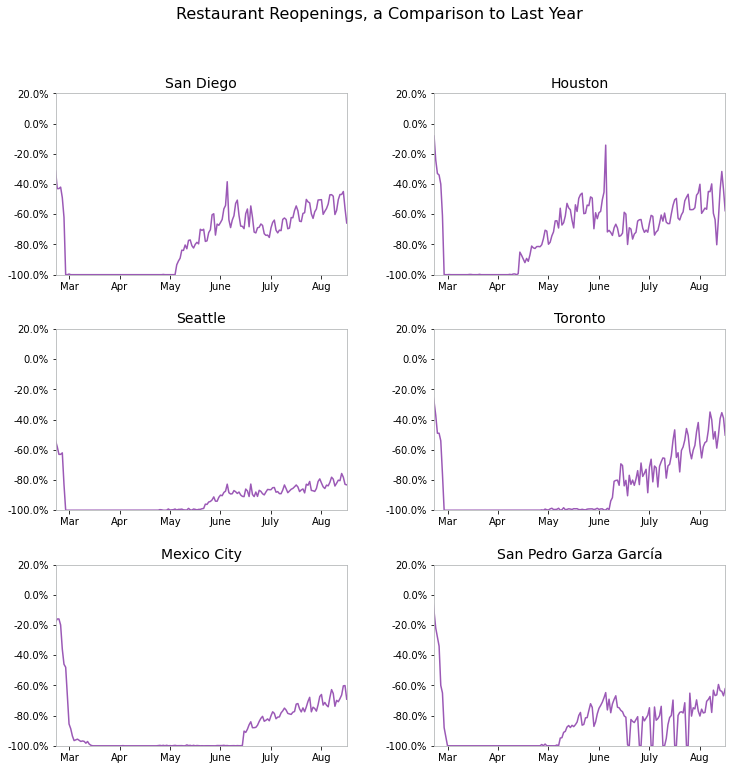

In [5]:
fig, axs = plt.subplots(3,2, figsize = (12,12))
x = df1.Date
cities = ['San Diego', 'Houston', 'Seattle','Toronto', 'Mexico City', 'San Pedro Garza García']
city_code = 0
for i in range(3):
  for j in range(2):
    axs[i,j].plot(x, df1[cities[city_code]], color = '#9b59b6')
    axs[i,j].set(xlim = ['3/11','8/31'], ylim = [-100,20])
    axs[i,j].set_title(cities[city_code], size=14) # Title
    for spine in axs[i,j].spines.values():
        spine.set_edgecolor('#b3b6b7')
    axs[i,j].xaxis.set_major_locator(plt.MaxNLocator(6)) 
    axs[i,j].set_xticklabels(['','Mar','Apr', 'May', 'June', 'July', 'Aug'])
    axs[i,j].set_yticklabels([str(x)+'%' for x in axs[i,j].get_yticks()])
    city_code += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=.3)
fig.suptitle('Restaurant Reopenings, a Comparison to Last Year', fontsize=16)

In [6]:
#Dynamic Chart

#Function defining line plot colors

def get_region_colors(region):
  mapping = {
        'United States': 'black',
        'Canada': '#A1BA59',
        'Mexico': '#C71585',
       }
  return mapping.get(region, '#C1B7AD')

In [8]:
date_cols = df.columns[~df.columns.isin(['Type','Name'])]

#Modifying the schema for better charts in Altair

df2 = (df.groupby('Name')[date_cols].sum()
       .stack().reset_index(name='Percent Change')
       .rename(columns={'level_1': 'Date', 'Country/Region': 'Country'}))

df2['Type'] = df2.Name.apply(lambda x: df.Type[df.Name == x].iloc[0])

In [10]:
alt.Chart(df2).mark_line().encode(x = 'Date', y = 'Percent Change', color = 'Name', shape = 'Type')

alt.Chart(...)

In [68]:
#Covid case data countrywise
url = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_case = pd.read_csv(url)
# select countries with restaurant data
df_case = df_case[df_case['Country/Region'].isin(['Australia', 'Canada', 'Germany', 'Global', 'Ireland', 'Mexico','United Kingdom', 'United States'])]  
dt_cols = df_case.columns[~df_case.columns.isin(['Province/State', 'Country/Region', 'Lat', 'Long'])]



#restructuring the case dataframe
dff = (df_case.groupby('Country/Region')[dt_cols].sum()
       .stack().reset_index(name='Confirmed Cases')
       .rename(columns={'level_1': 'Date', 'Country/Region': 'Country'}))

dff['Date'] = dff['Date'].apply(lambda x: str(x)[:-3])

In [69]:

dff.head()

Country  Date  Confirmed Cases
0  Australia  1/22                0
1  Australia  1/23                0
2  Australia  1/24                0
3  Australia  1/25                0
4  Australia  1/26                4

In [78]:
#Country
df_country = df2[df2.Type == 'country']

selection = alt.selection_multi(fields = ['Name'])
color = alt.condition(selection, alt.Color('Name:N', legend = None), alt.value('lightgray'))
line_chart = alt.Chart(df_country, title = '????').mark_line().encode(x = alt.X('Date', axis=alt.Axis(values = ['2/18','3/11','4/11','5/11','6/11','7/11','8/11'])), 
                                         y = alt.Y('Percent Change', title = '% change in seated diners compared to same time last year'), 
                                         color = color,
                                         opacity=alt.condition(selection, alt.value(1), alt.value(0.05)),
                                         tooltip = ['Name','Percent Change','Date']).properties(width=1000, height=500).interactive()


legend = alt.Chart(df_country).mark_point().encode(y = alt.Y('Name:N', title = 'Country', axis = alt.Axis(orient = 'right')), 
                                                   color = color).add_selection(selection).interactive()

line_chart | legend

alt.HConcatChart(...)

In [79]:
selection = alt.selection_multi(fields = ['Country'])
color = alt.condition(selection, alt.Color('Country:N', legend = None), alt.value('lightgray'))
line_chart2 = alt.Chart(dff, title = '????').mark_line().encode(x = alt.X('Date', axis=alt.Axis(values = ['2/18','3/11','4/11','5/11','6/11','7/11','8/11'])), 
                                         y = alt.Y('Confirmed Cases'), 
                                         color = color,
                                         opacity=alt.condition(selection, alt.value(1), alt.value(0.05)),
                                         tooltip = ['Country','Confirmed Cases', 'Date']).properties(width=1000, height=500).interactive()


legend = alt.Chart(dff).mark_point().encode(y = alt.Y('Country:N', axis = alt.Axis(orient = 'right')), 
                                                   color = color).add_selection(selection).interactive()

line_chart2 | legend

alt.HConcatChart(...)

In [81]:
#State
df_state = df2[df2.Type == 'state']

selection = alt.selection_multi(fields = ['Name'])
color = alt.condition(selection, alt.Color('Name:N', legend = None), alt.value('lightgray'))
line_chart = alt.Chart(df_state, title = '????').mark_line().encode(x = alt.X('Date', axis=alt.Axis(values = ['2/18','3/11','4/11','5/11','6/11','7/11','8/11'])), 
                                         y = alt.Y('Percent Change', title = '% change in seated diners compared to same time last year'), 
                                         color = color,
                                         opacity=alt.condition(selection, alt.value(1), alt.value(0.05)),
                                         tooltip = ['Name','Percent Change','Date']).properties(width=1000, height=500).interactive()


legend = alt.Chart(df_state).mark_point().encode(y = alt.Y('Name:N', title = 'State', axis = alt.Axis(orient = 'right')), 
                                                   color = color).add_selection(selection).interactive()

line_chart | legend

alt.HConcatChart(...)

In [85]:
#City
df_city = df2[df2.Type == 'city']

selection = alt.selection_multi(fields = ['Name'])
color = alt.condition(selection, alt.Color('Name:N', legend = None), alt.value('lightgray'))
line_chart = alt.Chart(df_city, title = '????').mark_line().encode(x = alt.X('Date', axis=alt.Axis(values = ['2/18','3/11','4/11','5/11','6/11','7/11','8/11'])), 
                                         y = alt.Y('Percent Change', title = '% change in seated diners compared to same time last year'), 
                                         color = color,
                                         opacity=alt.condition(selection, alt.value(1), alt.value(0.05)),
                                         tooltip = ['Name','Percent Change','Date']).properties(width=1000, height=500).interactive()


legend = alt.Chart(df_city).mark_point().encode(y = alt.Y('Name:N', title = 'City', axis = alt.Axis(orient = 'right')), 
                                                   color = color).add_selection(selection).interactive()

line_chart | legend

alt.HConcatChart(...)